## 0.0 Import Library

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1.0 Import Data

## 2.0 Data Preprocessing
* Drop useless columns
* Encoded data
* Divide into X and y
* Transfer to tensor
* Split training and test set

In [2]:
# Import Data
data = pd.read_csv("/kaggle/input/titanic/train.csv")
# Data Preprocessing
# Drop "Name", "PassengerId","Cabin","Ticket" which are basically random and has nothing to do with the survival rate.
data = data.drop(["Name","PassengerId","Cabin","Ticket"], axis=1)
# Encode the Embarked into numbers where 0 = C(Cherbourg), 1 = Q(Queenstown), 2 = S(Southampton)
data["Embarked"] = pd.Categorical(data["Embarked"])
data["Embarked"] = data["Embarked"].cat.codes
# Encode the Sex into numbers where 0 = female, 1 = male
data["Sex"] = pd.Categorical(data["Sex"])
data["Sex"] = data["Sex"].cat.codes

In [3]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [4]:
# Divide into X and y
X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [5]:
# NumPy to Tensor
tensor_X = tf.convert_to_tensor(X, dtype=tf.float32)
tensor_y = tf.convert_to_tensor(y, dtype=tf.float32)

2022-07-14 13:23:43.828168: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
len(tensor_y)

891

In [7]:
891*0.8

712.8000000000001

In [8]:
# Split into test and training set with size_train = 0.8
X_train, X_test, y_train, y_test = tensor_X[:712], tensor_X[713:], tensor_y[:712], tensor_y[713:]

In [9]:
X_train

<tf.Tensor: shape=(712, 7), dtype=float32, numpy=
array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  2.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  0.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  1.    ,     nan, ...,  1.    , 15.2458,  0.    ],
       [ 1.    ,  0.    , 24.    , ...,  0.    , 49.5042,  0.    ],
       [ 1.    ,  1.    ,     nan, ...,  0.    , 26.55  ,  2.    ]],
      dtype=float32)>

Firstly check different scatter plot to see if there are any relations between survival and Sex, Age, Pclass, SibSp, Parch, Fare, Embarked.
Survival: 0(red) = No, 1(blue) = Yes

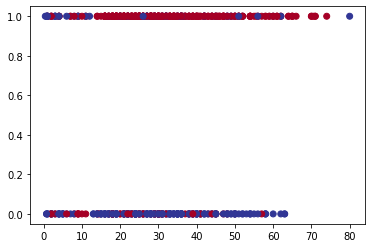

In [10]:
plt.scatter(X["Age"],X["Sex"], c=y, cmap=plt.cm.RdYlBu)

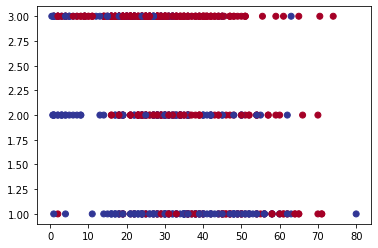

In [11]:
plt.scatter(X["Age"],X["Pclass"], c=y, cmap=plt.cm.RdYlBu)

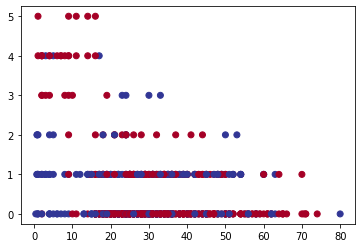

In [12]:
plt.scatter(X["Age"],X["SibSp"], c=y, cmap=plt.cm.RdYlBu)

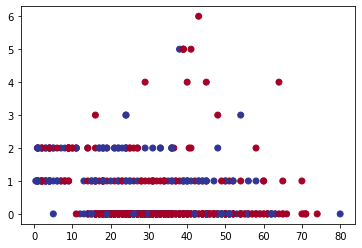

In [13]:
plt.scatter(X["Age"],X["Parch"], c=y, cmap=plt.cm.RdYlBu)

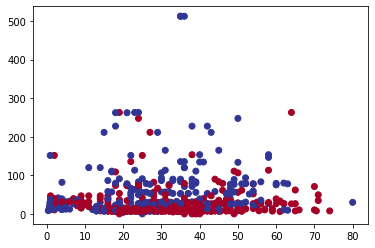

In [14]:
plt.scatter(X["Age"],X["Fare"], c=y, cmap=plt.cm.RdYlBu)

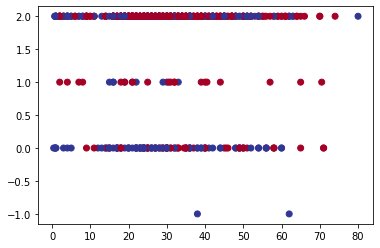

In [15]:
plt.scatter(X["Age"],X["Embarked"], c=y, cmap=plt.cm.RdYlBu)

Looks like most of columns are related to Survival rate.
Then, let's build the model!


## 3.0 Model Preparation

In [16]:
tf.random.set_seed(42)

In [17]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(25,activation="relu"),
    tf.keras.layers.Dense(25,activation="relu"),
    tf.keras.layers.Dense(25,activation="relu"),
    tf.keras.layers.Dense(25,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [18]:
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])

In [19]:
model_1.fit(X_train, y_train, epochs=10)

2022-07-14 13:23:47.047220: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
23/23 [==============================] - 1s 3ms/step - loss: 0.7054 - accuracy: 0.5478
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.6096
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.6096
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.6096
Epoch 5/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.6096
Epoch 6/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.6096
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6880 - accuracy: 0.6096
Epoch 8/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6096
Epoch 9/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6858 - accuracy: 0.6096
Epoch 10/10
23/23 [==============================] - 0s 6ms/step - loss: 0.6847 - accuracy: 0.6096


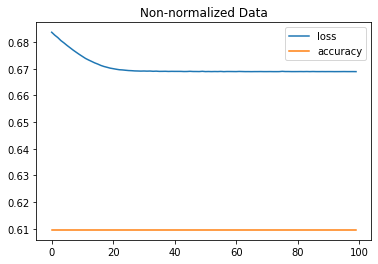

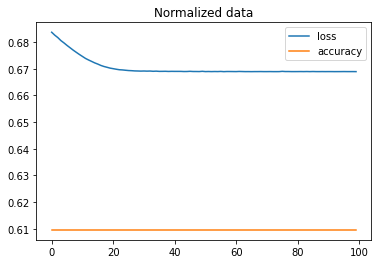

In [20]:
fit_1 = model_1.fit(X_train, y_train, epochs=100,verbose = 0)
# Plot non-normalized data loss curves
pd.DataFrame(fit_1.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(fit_1.history).plot(title="Normalized data");

Theaccuracy looks not good, let's see the prediction accuracy.

In [21]:
y_pred_test = model_1.predict(X_test)

In [22]:
y_pred_test = tf.round(y_pred_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test, 
                 y_pred=y_pred_test)



array([[115,   0],
       [ 63,   0]])

In [23]:
# Import Data
data = pd.read_csv("../input/titanic/test.csv")
# Data Preprocessing
# Drop "Name", "PassengerId","Cabin","Ticket" which are basically random and has nothing to do with the survival rate.
data_predict = data.drop(["Name","PassengerId","Cabin","Ticket"], axis=1)
# Encode the Embarked into numbers where 0 = C(Cherbourg), 1 = Q(Queenstown), 2 = S(Southampton)
data_predict["Embarked"] = pd.Categorical(data_predict["Embarked"])
data_predict["Embarked"] = data_predict["Embarked"].cat.codes
# Encode the Sex into numbers where 0 = female, 1 = male
data_predict["Sex"] = pd.Categorical(data_predict["Sex"])
data_predict["Sex"] = data_predict["Sex"].cat.codes
# NumPy to Tensor
tensor_predict = tf.convert_to_tensor(data_predict, dtype=tf.float32)

In [24]:
result = tf.round(model_1.predict(tensor_predict)).numpy().astype(int)

In [25]:
#Create a  DataFrame with the passengers ids and our prediction regarding whether they survived or not
submission = pd.DataFrame({'PassengerId':data['PassengerId'],'Survived':pd.DataFrame(result)[0]})

#Visualize the first 5 rows
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [26]:
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: Titanic Predictions 1.csv


In [27]:
pd.read_csv("./Titanic Predictions 1.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
